# Compte Rendu du TP3 Optimisation M1 

* Dang, Ma√Ø-Anh M1 SAR
* Kim, Juyeon M1 SAR
* octobre 16 2023

## Probl√®me 1.

### Enonc√©

Soit la fonction $J(x_1,x_2) = (x_1-1)^2 +2(x_1^2-x_2)^2$. Il s‚Äôagit d‚Äôune banane de Rosenbrock, mais avec un facteur 2 au
lieu de 10.
Implanter la m√©thode du gradient √† pas fixe pour d√©terminer le minimum de cette fonction.

Sch√©ma g√©n√©ral de l‚Äôalgorithme :

Notations :
* $X_n$ et $X_{n+1}$ : point initial et point final de l‚Äôit√©ration ùëõ.
* ùëëùëã : pas de d√©placement pour une it√©ration
* ùëõ et $n_{max}$ : compteur d‚Äôit√©rations et nombre maximal d‚Äôit√©rations autoris√©
* $X_0$ : point de d√©part de l‚Äôalgorithme
* ùõº : pas de recherche
* ùúÄ : crit√®re de pr√©cision
* ùëêùëúùëõùë£ùëíùëüùëîùëí : indicateur bool√©en de convergence

Algorithme :
* Choix des param√®tres de l‚Äôalgorithme : $X_0$, ùõº, ùúÄ, $n_{max}$
* Initialisation : $X_n$ ‚Üê $X_0$ , ùëëùëã ‚Üê 1, ùëõ ‚Üê 0
* Tant que ùëëùëã > ùúÄ et ùëõ < $n_{max}$:
    * $X_{n+1}$ ‚Üê $X_{n}$  - ùõº. ‚àá$J(X_{n})$
    * ùëëùëã ‚Üê ‚Äñ $X_{n+1}$ - $X_n$‚Äñ
    *  $X_{n}$‚Üê  $X_{n+1}$
    * $n ‚Üê ùëõ + 1$
* converge ‚Üê dX &leq; &epsilon;

### Fonctions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gradient import *
#import J, gradient_J, gradient_descent, gradient_descent_n, base_fun, J3, gradient_J3, systeme, gradient_descent_optimal

### Test de l'algorithme

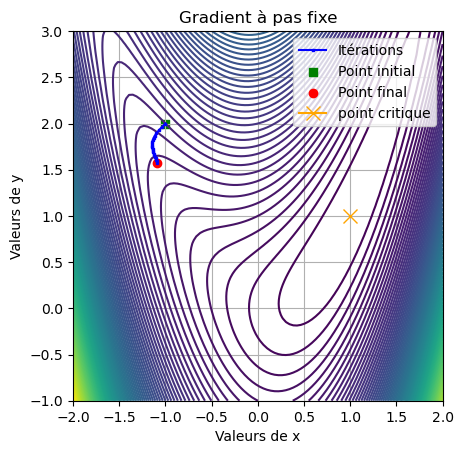

Ne converge pas apr√®s 20 iterations.


In [4]:
# Test de l'algorithme : 
#Param√®tres
point_initial = [-1,2] #X0
alpha = 0.01
epsilon = 1e-5
max_iterations = 20

# Ex√©cution de l'algorithme
path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)

# D√©finition du domaine de trac√©
xmin, xmax, nx = -2,2,100
ymin, ymax, ny = -1,3,100
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100
plt.contour(x2d, y2d, J(x2d, y2d), nIso)

#Trac√© du graphe
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='It√©rations')
plt.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
plt.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
plt.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
plt.title('Gradient √† pas fixe')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

if convergence:
    print(f"Convergence en {len(path)} iterations. Point final: {path[-1]}")
else:
    print(f"Ne converge pas apr√®s {max_iterations} iterations.")

##print(f"Converged: {convergence}")
#print(f"Number of iterations: {len(path)-1}")
#print(f"Final point: {path[-1]}")

### Tests propos√©s:
Tests propos√©s : point de d√©part(), alpha = 0,2 ; 0,1 ; 0.05 , ùúÄ = 10^-3; 10^-6; 10^-10,  nombre maximum d‚Äôit√©rations = 1000. 

#### Alphas

/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: overflow encountered in scalar multiply
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:36: RuntimeWarning: invalid value encountered in subtract
  x_new = x_n - alpha * gradient
/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: overflow encountered in scalar power
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:17: RuntimeWarning: overflow encountered in scalar power
  df_dx2 = -2*2 * (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx2 = -2*2 * (x1**2 - x2)


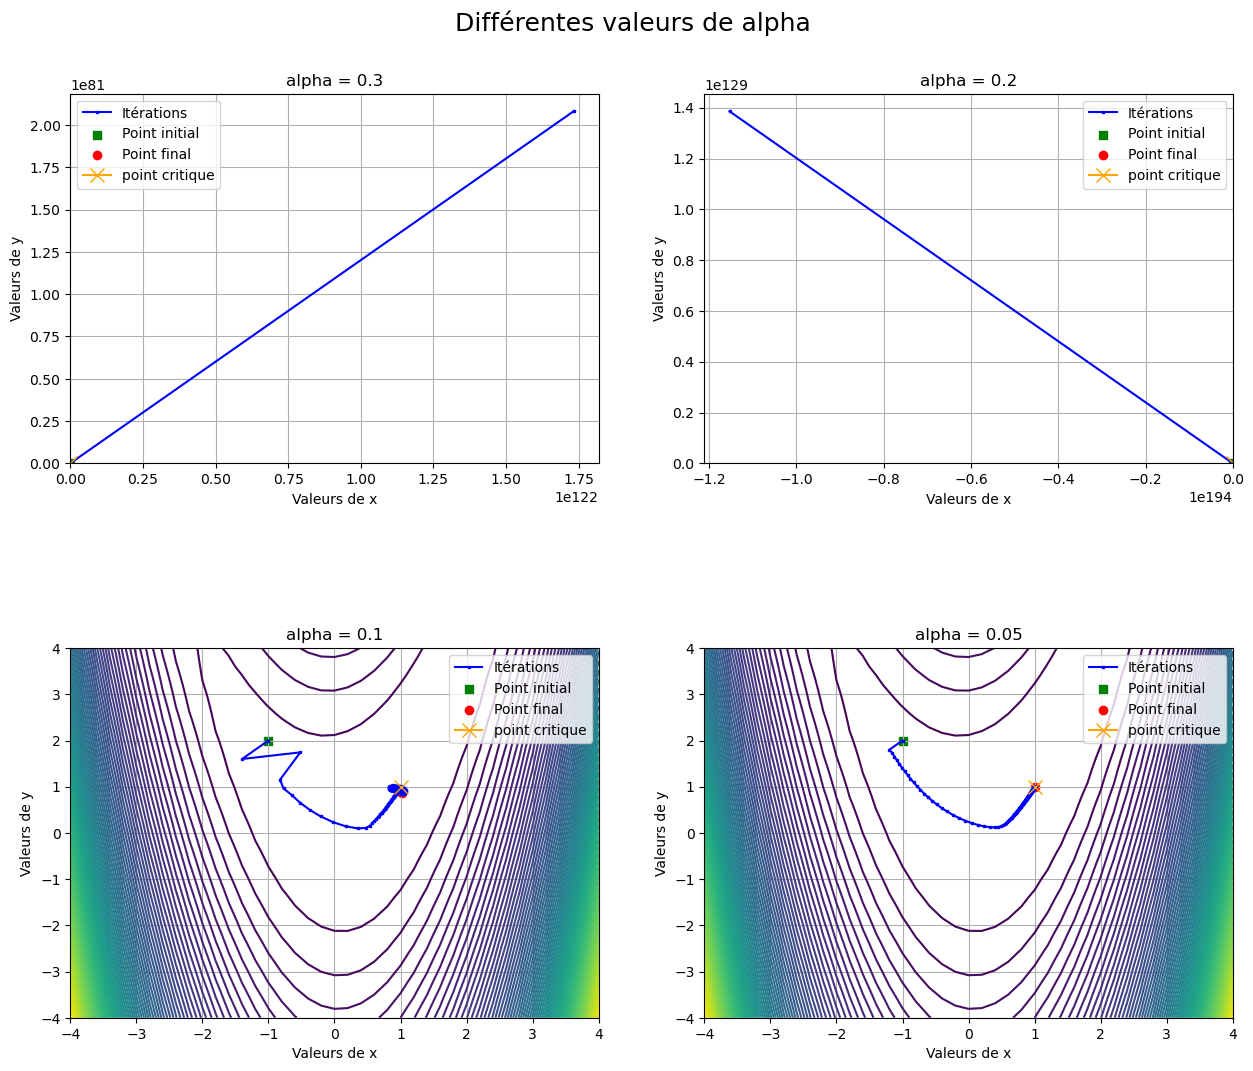

In [5]:
point_initial = [-1,2]
epsilon = 1e-5
max_iterations = 1000
alpha_values = [0.3,0.2,0.1,0.05]

# D√©finition du domaine de trac√©
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Diff√©rentes valeurs de alpha", fontsize=18, y=0.95)

for n, alpha in enumerate(alpha_values):
    ax = plt.subplot(2,2, n + 1)
    ax.contour(x2d, y2d, J(x2d, y2d), nIso)
    path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='It√©rations')
    ax.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
    ax.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
    ax.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
    ax.set_title(f'alpha = {alpha}')
    ax.set_xlabel('Valeurs de x')
    ax.set_ylabel('Valeurs de y')
    ax.grid()
    ax.legend()


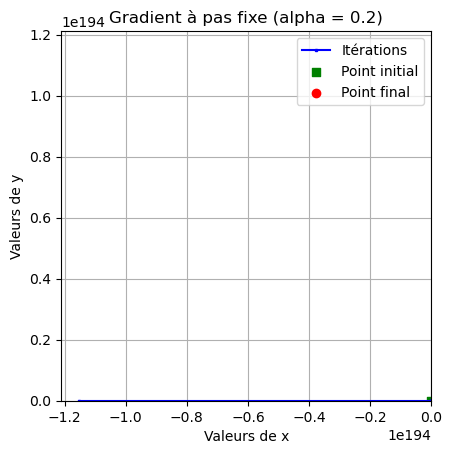

Ne converge pas apr√®s 1000 iterations.


In [6]:
# Test de l'algorithme : 
#Param√®tres
point_initial = [-1,2] #X0
alpha = 0.2
epsilon = 1e-5
max_iterations = 1000

# Ex√©cution de l'algorithme
path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)

# D√©finition du domaine de trac√©
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100
plt.contour(x2d, y2d, J(x2d, y2d), nIso)

#Trac√© du graphe
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='It√©rations')
plt.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
plt.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
plt.title('Gradient √† pas fixe (alpha = 0.2)')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

if convergence:
    print(f"Convergence en {len(path)} iterations. Point final: {path[-1]}")
else:
    print(f"Ne converge pas apr√®s {max_iterations} iterations.")

#### Epsilons

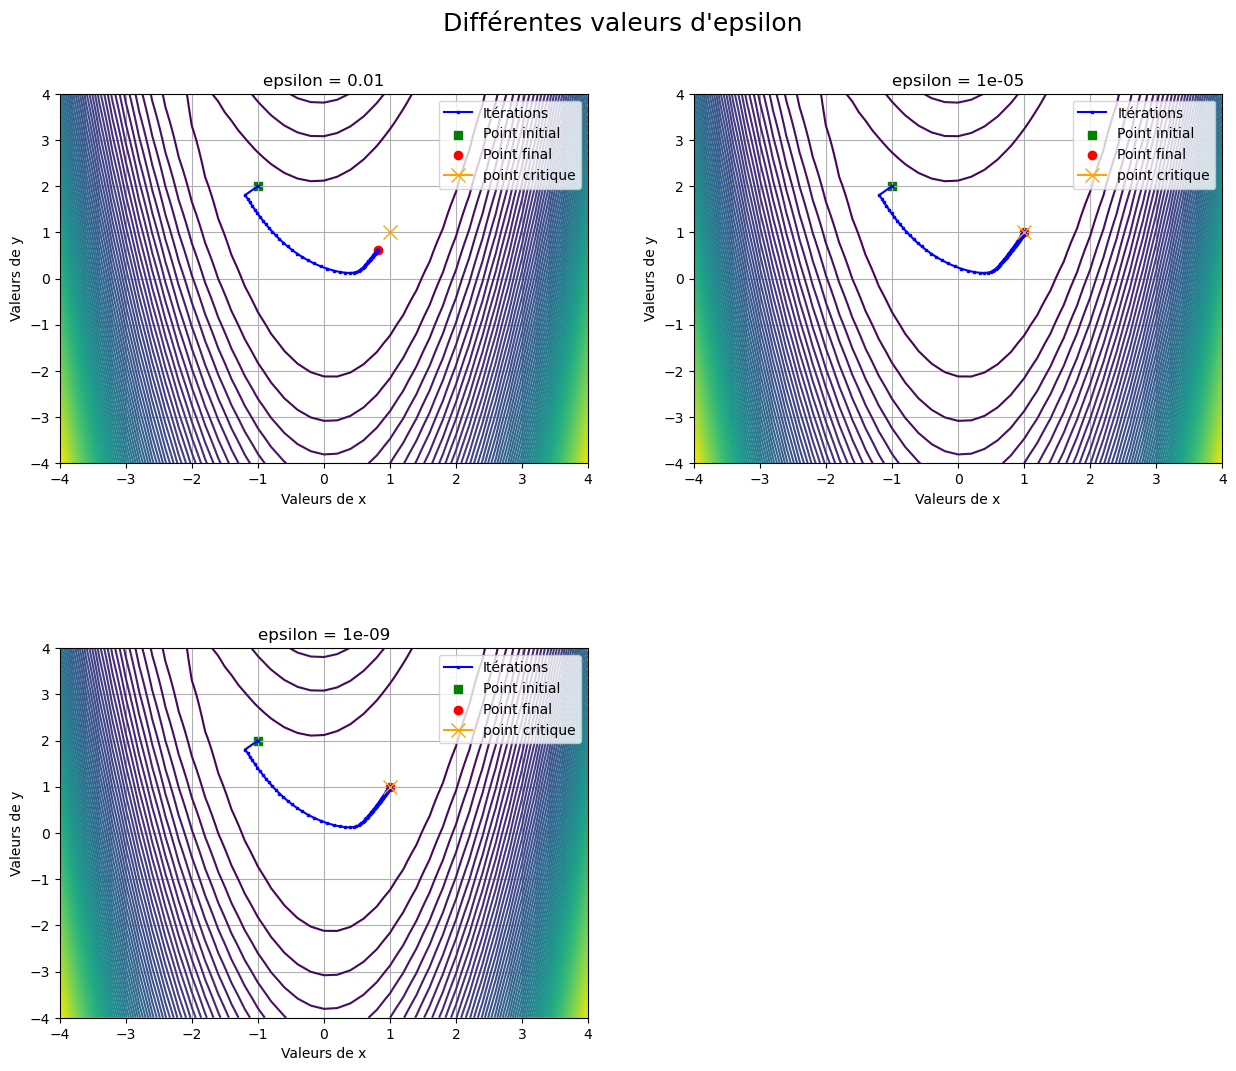

In [7]:
point_initial = [-1,2]
epsilon_values = [10e-3,10e-6,10e-10] 
max_iterations = 1000
alpha = [0.05]

# D√©finition du domaine de trac√©
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Diff√©rentes valeurs d'epsilon", fontsize=18, y=0.95)

for n, epsilon in enumerate(epsilon_values):
    ax = plt.subplot(2,2, n + 1)
    ax.contour(x2d, y2d, J(x2d, y2d), nIso)
    path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='It√©rations')
    ax.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
    ax.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
    ax.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
    ax.set_title(f'epsilon = {epsilon}')
    ax.set_xlabel('Valeurs de x')
    ax.set_ylabel('Valeurs de y')
    ax.grid()
    ax.legend()


On met en √©vidence ci-dessous que l'algorithme diverge si alpha d√©passe une certaine valeur. On choisit un epsilon pas tr√®s petit, ici 1e-3

In [8]:
point_initial = [-1,2]
epsilon = 1e-3
max_iterations = 1000
alpha_values = [0.001,0.01, 0.1, 0.15, 0.2]
divergence_alpha = {}

# D√©finition du domaine de trac√©
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Diff√©rentes valeurs de alpha", fontsize=18, y=0.95)

for alpha in alpha_values:
    path, convergence, n_iterations = gradient_descent_n(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    if convergence:
        print(f"Converg√© avec alpha={alpha} dans {n_iterations} it√©rations.")
    else:
        print(f"Diverge avec alpha={alpha} apr√®s {n_iterations} it√©rations.")

Diverge avec alpha=0.001 apr√®s 1000 it√©rations.
Converg√© avec alpha=0.01 dans 430 it√©rations.
Converg√© avec alpha=0.1 dans 98 it√©rations.
Diverge avec alpha=0.15 apr√®s 13 it√©rations.
Diverge avec alpha=0.2 apr√®s 9 it√©rations.


<Figure size 1500x1200 with 0 Axes>

In [9]:
point_initial = [-1,2]
epsilon = 1e-3
max_iterations = 1000
alpha_values = np.arange(0.1, 0.15, 0.005)
divergence_alpha = {}

# D√©finition du domaine de trac√©
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Trac√© des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Diff√©rentes valeurs de alpha", fontsize=18, y=0.95)

for alpha in alpha_values:
    path, convergence, n_iterations = gradient_descent_n(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    if convergence:
        print(f"Converg√© avec alpha={alpha} en {len(path)} iterations. Point final: {path[-1]}")
    else:
        print(f"Ne converge pas avec alpha={alpha} apr√®s {max_iterations} iterations.")

Converg√© avec alpha=0.1 en 99 iterations. Point final: [0.98970414 0.9774017 ]
Converg√© avec alpha=0.10500000000000001 en 94 iterations. Point final: [0.98993612 0.97790958]
Ne converge pas avec alpha=0.11000000000000001 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.11500000000000002 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.12000000000000002 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.12500000000000003 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.13000000000000003 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.13500000000000004 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.14000000000000004 apr√®s 1000 iterations.
Ne converge pas avec alpha=0.14500000000000005 apr√®s 1000 iterations.


<Figure size 1500x1200 with 0 Axes>

En effet, l'algorithme diverge pour alpha sup√©rieur √† 0.13.

## Probl√®me 2 :
Le point $M_{1}$ appartient √† la parabole $P_{1}$ d'√©quation $u+\frac{1}{2} (v-2)^{2}-1 = 0$. Le point $M_{2}$ appartient √† la parabole $P_{2}$ d'√©quationn $v-(u-3)^{2} - 2 = 0$. On souhaite d√©terminier les coordonn√©es des points $M_{1}$ et $M_{2}$, respectivement not√©s $(x_{1},x_{2})$ et $(x_{3},x_{4})$ de fa√ßon √† minimiser la distance entre $M_{1}$ et $M_{2}$.

* Faire une figure repr√©sentant les donn√©es du probl√®me, puis mettre le probl√®me sous la forme d‚Äôun probl√®me d‚Äôoptimisation sous contraintes-√©galit√©s (variables de d√©cision, fonction co√ªt, contraintes).
* Appliquer la m√©thode des multiplicateurs de Lagrange pour r√©soudre le probl√®me. Le syst√®me d‚Äô√©quations obtenu sera r√©solu num√©riquement par la fonction scipy.optimize.root.
* Faire une figure montrant la solution et les √©lements g√©om√©triques remarquables

### Figure de repr√©sentation et visualisation des paraboles :


In [10]:
# D√©finition du parabole P1
v1_vals = np.linspace(-10,10,20)
u1 = 1 - 0.5*(v1_vals- 2)**2

# D√©finition du parabole P2
u2_vals = np.linspace(-10,10,20)
v2 = 2 + (u2_vals - 3)**2

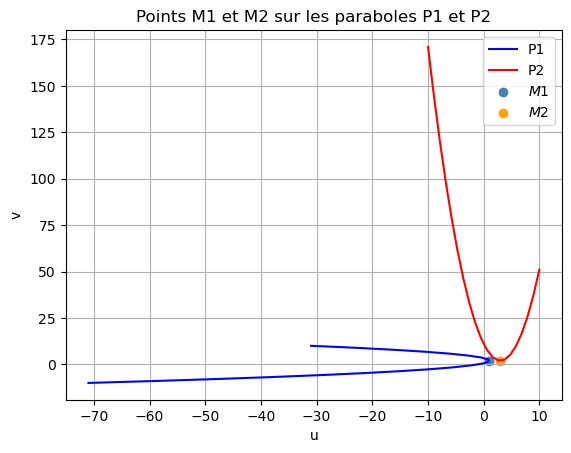

In [11]:
# Points satisfaisant P1 et P2
M1 = [1,2]
M2 = [3,2]

# Trac√© du graphe
plt.clf()
plt.plot(u1, v1_vals, color='b', label='P1')
plt.plot(u2_vals, v2, color='r', label='P2')
plt.scatter(*M1, color='steelblue', label='$M1$')
plt.scatter(*M2, color='orange', label='$M2$')
plt.title('Points M1 et M2 sur les paraboles P1 et P2')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()


**Nous remarquons ici que pour P1, la fonction y(x) n'est pas d√©finie pour x>1, ce qui explique notre repr√©sentation limit√©e √† la d√©finition de cette variable.**



### Probl√®me sous contraintes-√©galit√©s:
La fonction √† minimiser ici est la fonction distance entre $M_1$ et $M_2$, ce qui √©quivaut √† minimiser son carr√©. Ce choix est effectu√© car d'une part, les deux fonctions sont proprortionnellement croissantes, et d'autre part aprce que la fonction carr√©e est d√©rivable et convexe, facilitant ainsi nos calculs.


* Variables de d√©cision  : $X = (u_{1},u_{2},v_{1},v_{2})$ avec $M_1$=($u_{1},v_{1}$) et $M_2$=($u_{2},v_{2}$).
* Fonction co√ªt : $J(u_{1},u_{2},v_{1},v_{2}) = (u_{1}-u_{2})^{2}+(v_{1}-v_{2})^{2}$
* Contraintes :
    * $C_{1}(X) = u_{1}+\frac{1}{2} (v_{1}-2)^{2}-1 = 0$
    * $C_{2}(X) = v_{2}-(u_{2}-3)^{2} - 2 = 0$

### M√©thodes des multiplicateurs de Lagrange

Calculons √† pr√©sent les Gradients $\nabla C_{1}$,$\nabla C_{2}$ et $\nabla J$ afin d'appliquer la formule vue en cours suivante, o√π $x^{*}$ repr√©sente le vecteur solution de notre probl√®me.  

$\nabla J  (x^{*})+ \lambda_{1}\nabla C_{1}(x^{*}) + \lambda_{2}\nabla C_{2}(x^{*}) = 0$


  \begin{align}
    \nabla J_(x^{*}) &= \begin{bmatrix}
      2(u1-u2)\\
      -2(u1-u2)\\
      2(v1-v2)\\
      -2(v1-v2)
      \end{bmatrix}
  \end{align}

  \begin{align}
    \nabla C_{1}(x^{*}) &= \begin{bmatrix}
      1\\
      0\\
      v1-2 \\
      0
      \end{bmatrix}
  \end{align}

  \begin{align}
    \nabla C_{2}(x^{*}) &= \begin{bmatrix}
      0 \\
      -2(u2-3) \\
      0 \\
      1
      \end{bmatrix}
  \end{align}

  Nous obtenons ainsi le syst√®me suivant, r√©solu par la fonction scipy.optimize.root.

\begin{equation}
    \begin{cases}
    2(u1-u2)+\lambda _{1} =0\\
    -2(u1-u2)-2\lambda _{2}(u2-3)=0\\
    2(v1-v2)+\lambda {1}(v1-2) =0\\
    -2(v1-v2)+\lambda _{2} = 0\\
    u1+0.5(v1-2)^2 -1=0\\
    v2-(u2-3)^2 -2=0
    
    \end{cases}\,.
\end{equation}

In [12]:
sol = optimize.root(base_fun, [0,0,0,0,0,0])
print(sol)
print(sol.x)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.692e-10 -2.176e-10  1.287e-10  1.261e-11 -3.196e-11
            9.888e-12]
       x: [ 8.791e-01  1.983e+00  2.492e+00  3.034e+00  2.208e+00
           -1.085e+00]
    nfev: 45
    fjac: [[-7.021e-01  6.260e-01 ... -3.347e-01 -4.346e-03]
           [-3.035e-02 -2.511e-01 ... -3.104e-01 -7.263e-01]
           ...
           [ 6.421e-01  5.545e-01 ... -2.663e-01  1.857e-01]
           [ 9.312e-02 -3.202e-01 ... -8.141e-01  2.655e-01]]
       r: [-2.893e+00  2.623e+00 ...  1.587e+00 -1.116e+00]
     qtf: [ 1.225e-08  1.928e-10  2.879e-09  3.195e-09  1.949e-08
           -1.159e-08]
[ 0.87914761  1.98298493  2.4916348   3.03431964  2.20767465 -1.08536969]


### Figure montrant la solution et les √©l√©ments g√©om√©triques remarquables:

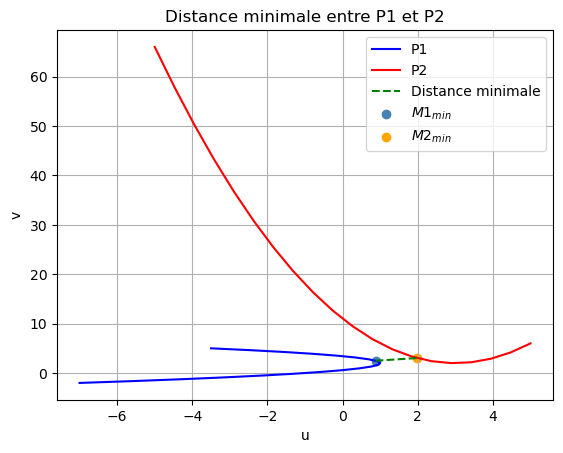

In [13]:
# Trac√© du graphe avec la distance minimale
plt.clf()

# D√©finition du parabole P1
v1_vals = np.linspace(-2,5,20)
u1 = 1 - 0.5*(v1_vals- 2)**2

#P2
u2_vals = np.linspace(-5,5,20)
v2 = 2 + (u2_vals - 3)**2

#Coordonn√©s des points M1, M2
m1 = [sol.x[0], sol.x[2]]
m2 = [sol.x[1], sol.x[3]]

plt.plot(u1, v1_vals, color='b', label='P1')
plt.plot(u2_vals, v2, color='r', label='P2')
plt.plot([sol.x[0], sol.x[1]], [sol.x[2],sol.x[3]],color='green', linestyle="--", label='Distance minimale')
plt.scatter(*m1, color='steelblue', label='$M1_{min}$')
plt.scatter(*m2, color='orange', label='$M2_{min}$')
plt.title('Distance minimale entre P1 et P2')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()

## Exercice 3:

### Enonc√©

On reprend la fonction du probl√®me 1, mais on souhaite maitenant mettre en ≈ìuvre la m√©thode du gradient √† pas optimal pour d√©terminer le minimum de cette fonction.
* Une it√©ration de la m√©thode du gradient √† pas optimal consiste √† d√©terminer $(x_{1,n+1}, x_{2,n+1})$ le minimum de ùêΩ dans la direction du gradient de ùêΩ au point $x_{1,n}, x_{2,n}$, solution approch√©e en d√©but d‚Äôit√©ration. Formuler
ce probl√®me comme un probl√®me de minimisation sous contrainte-√©galit√©.
* Appliquer la m√©thode des multiplicateurs de Lagrange pour r√©soudre le probl√®me pos√© ci-dessus (1 it√©ration de la m√©thode du gradient optimal). Vous pouvez utiliser la fonction scipy.optimize.root pour la r√©solution du syst√®me d‚Äô√©quations obtenu. Attention, la fonction root peut ne pas r√©ussir √†
r√©soudre le syst√®me. Comme pour toute m√©thode num√©rique, il faut donc tester l‚Äôindicateur de succ√®s de la fonction (voir documentation) avant d‚Äôen accepter les r√©sultats.
* Faire une figure montrant 1 it√©ration de la m√©thode du gradient optimal et les √©lements g√©om√©triques remarquables.
* Enchainer quelques it√©rations de la m√©thode du gradient optimal et faire une figure montrant le r√©sultat et les √©lements g√©om√©triques remarquables.
* Maintenant que vous savez comment √ßa marche, utiliser la fonction scipy.optimize.minimize pour ne plus avoir √† impl√©menter d‚Äôalgorithme de recherche de minimum !

### Probl√®me de minimisation sous contrainte-√©galit√©.
$G(\alpha) = J[X_n - \alpha \cdot \nabla J(X_n)]$ 

La fonction √† minimiser ici est $J(X_{n+1})$, c'est-√†-dire trouver $X_{n+1}$ appartenant √† la droite $D(X_n,\vec{\nabla J}(X_n))$
* avec fonction co√ªt:
    * $J_3(x_1,x_2) = (x_1-1)^2 +2(x_1^2-x_2)^2$ 
* variables de d√©cision:  
    * $X = (x1,x2,l)$
* Contraintes :
    * $C(X_{n+1})=0$

* \begin{align}
    \nabla J_(x^{*}) &= \begin{bmatrix}
      2(x1-1)+2*2*2*x1(x1^2-x2)\\
      -2*2(x1^2-x2)
      \end{bmatrix}
  \end{align}

Cela vient du fait que :
* $\vec{X_nX_{n+1}} // \vec{\nabla J}(X_n)$, 
* $det(\vec{X_1X_{n+1}}, \vec{\nabla J}(X_n))=0 \\ 
= dJ_{Yn}(X-X_n)-dJ_{Xn}(Y-Y_n)=C(X,Y)$.
* $\nabla C = \begin{bmatrix}
      dJ_{Yn}\\
      -dJ_{Xn}
      \end{bmatrix} $

Pour la suite, on utilisera x pour x1 et y pour x2 afin de simplier l'√©criture.

#### M√©thode des multiplicateurs de Lagrange

In [14]:
#point de d√©part : X = [-1,2]
X_var = [-1,2,1]
X = [-1,2]
dX = gradient_J3(X)
param = [X[0],X[1],dX[0],dX[1]]
sol = opt.root(systeme,X_var,param)
sol.x
print(sol.message)

The solution converged.


##### Figure de 1 it√©ration de la m√©thode du gradient optimal.

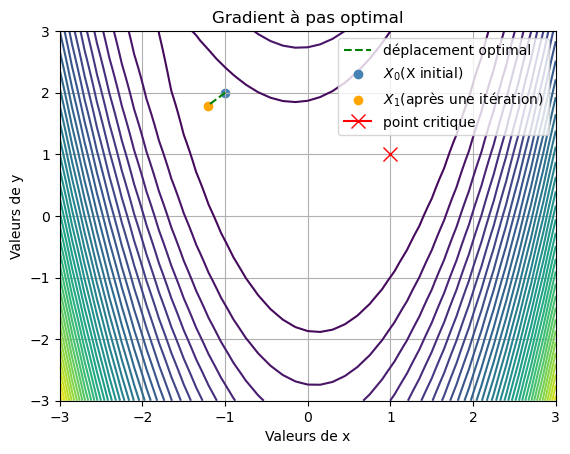

In [15]:
# Trac√© d'une iteration de la methode du gradient optimal
plt.clf()

# D√©finition du domaine de trac√©
xmin, xmax, nx = -3,3, 41
ymin, ymax, ny = -3, 3, 41
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

#Coordonn√©s de point p1,
p1 = [sol.x[0], sol.x[1]]


# Trac√© des isovaleurs de J
nIso = 41
plt.contour(x2d, y2d, J3([x2d, y2d]), nIso)

#Trac√© du graphe
plt.plot([X[0], sol.x[0]], [X[1],sol.x[1]],color='green', linestyle="--", label='d√©placement optimal')
plt.scatter(*X, color='steelblue', label='$X_0 $(X initial)')
plt.scatter(*p1, color='orange', label='$X_1 $(apr√®s une it√©ration)')
plt.plot(1,1,marker = "x",color = 'red', ms = 10, label = 'point critique')
plt.title('Gradient √† pas optimal')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
#plt.axis('square')

plt.show()

#### Fonction pour faire plusieurs it√©rations

##### Figure 

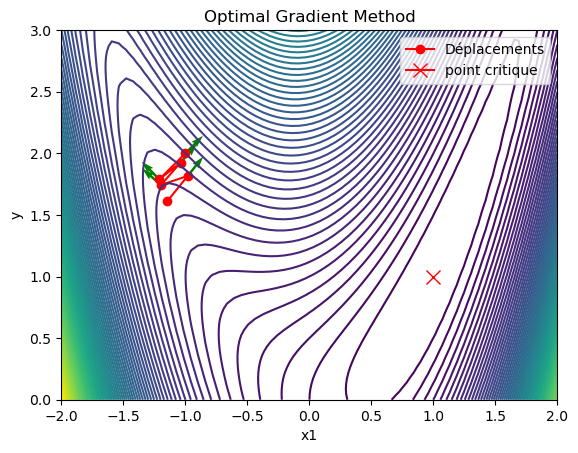

In [16]:
# Initial point
initial_point = np.array([-1, 2, 1])

# Perform several iterations of the method
max_iterations = 5
path = gradient_descent_optimal(initial_point, max_iterations)

# Plot the results
path = np.array(path)

# Extract x and y coordinates
x_values = path[:, 0]
y_values = path[:, 1]

# Plot the scatter points
#plt.scatter(x_values[0], y_values[0], label='X_0')
#plt.scatter(x_values[-1], y_values[-1], label='X_f')

# Plot the line connecting the points
plt.plot(x_values, y_values, marker='o', linestyle='-', color='red', label='D√©placements')

# Trac√© des isovaleurs de J
# D√©finition du domaine de trac√©
xmin, xmax, nx = -2,2, 70 
ymin, ymax, ny = 0, 3,70
# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)
nIso = 100
plt.contour(x2d, y2d, J3([x2d, y2d]), nIso)
# Ajouter les vecteurs gradients
for i in range(len(x_values)-1):
    current_point = np.array([x_values[i], y_values[i]])
    next_point = np.array([x_values[i+1], y_values[i+1]])
    gradient_vector = gradient_J3(current_point)
    gradient_vector /= np.linalg.norm(gradient_vector)
    # Plot the vector
    plt.quiver(current_point[0], current_point[1], gradient_vector[0], gradient_vector[1],
               scale=20, color='green', width=0.005)
plt.plot(1,1,marker = "x",color = 'red', ms = 10, label = 'point critique')
plt.title('Optimal Gradient Method')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

#### scipy.optimize.minimize

R√©sultats de la minimisation :
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.032318417686023e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 13
      jac: [-1.080e-07 -5.054e-06]
 hess_inv: [[ 4.889e-01  9.777e-01]
            [ 9.777e-01  2.205e+00]]
     nfev: 54
     njev: 18


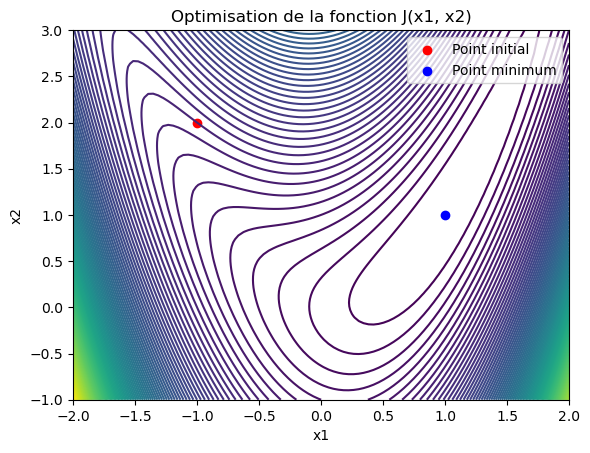

In [18]:
import numpy as np
from scipy.optimize import minimize

# D√©finition de la fonction J(x1, x2)
def J(x):
    x1, x2 = x
    return (x1 - 1)**2 + 2 * (x1**2 - x2)**2

# Point initial
initial_point = np.array([-1, 2])

# Utilisation de minimize
result = minimize(J, initial_point, method='BFGS')

# Affichage des r√©sultats
print("R√©sultats de la minimisation :")
print(result)

# D√©finition du domaine de trac√©
xmin, xmax, nx = -2,2,100
ymin, ymax, ny = -1,3,100
# Discr√©tisation du domaine de trac√©
x1_vals = np.linspace(xmin, xmax, nx)
x2_vals = np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = J([X1, X2])

# Trac√© de la fonction J(x1, x2)
niso=100
plt.contour(X1, X2, Z, nIso)

# Point initial
plt.scatter(initial_point[0], initial_point[1], color='red', label='Point initial')

# Point du minimum
min_point = result.x
plt.scatter(min_point[0], min_point[1], color='blue', label='Point minimum')

# Lignes de niveau
plt.title('Optimisation de la fonction J(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
